In [3]:
from uncertainties import * 
from math import *
from pylab import *
from matplotlib import *
import matplotlib.pyplot as pyplot
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit

By using the following code, the theoretical formula, based on the equation (1), has produced, which produces theta vs intensity. The formuala is not normalized yet, but the pattern from the theoretical data confirms with what we expected.

Text(0, 0.5, 'I')

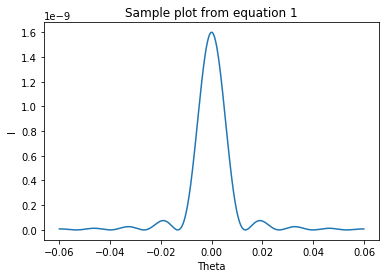

In [21]:
#Step 1: Function plot
def diffract(theta:list,w,s,N,lmbda,scale):
    k = 2*pi/lmbda;
    v = 0.5*k*s*np.sin(theta);
    u = 0.5*k*w*np.sin(theta);
    y = w**2 * (((sin(u))/(u))*((sin(N*v))/(sin(v))))**2
    y = y * scale
    return y

lmbda = 532e-9;
theta = np.arange(0.000001,0.06,0.0001);
theta = numpy.union1d(theta, -1*theta)
w = 0.00004;
s = 0.4;
N = 1;
I = np.zeros(size(theta))
i = 0
scale = 1
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
position = tan(theta);
plot(sin(theta),I)
pyplot.title("Sample plot from equation 1")
pyplot.xlabel("Theta")
pyplot.ylabel("I")

In [42]:
print(sin(90))

0.8939966636005579


Then, the following code is used to load the data and plot them in terms of sin(theta) and intensity. Here, I use one of the data as an example to show that the data collected looks similar to what we expected.

Text(0, 0.5, 'I')

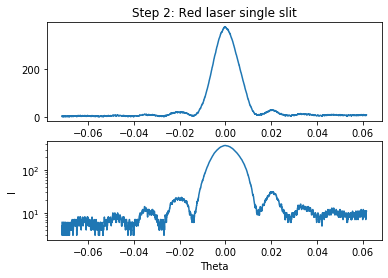

In [22]:
#Step 2: Data plot
data = np.loadtxt('Red_1slit0.04.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)

subplot(211);
pyplot.title("Step 2: Red laser single slit")
plot(sin(theta),intense)
subplot(212);
semilogy(sin(theta),intense);
grid
pyplot.xlabel("Theta")
pyplot.ylabel("I")

Here I will calculate the width w by using the data I have here (Red laser with single slit), which we will use the point that has minimum intensity. Since at such points 0 = sin(u) = sin(0.5kwsin(theta)), we can find the position when 0.5kwsin(theta) = pi and 2pi. The same data is loaded in matlab to make the finding of the minimum intensity easier.

The sin(theta) position that corresponds to the minimum of the intensity are 0.01467,0.01461,0.0278,0.02731. Therefore, by solving the equation and get the mean, the final result of w is taken as:

In [23]:
PAI = pi;
PAI2 = 2*pi;
stheta = np.array([0.01467,0.01461]);
stheta2 = np.array([0.0278,0.02731]);
lmbda = 650e-9;
k = 2*pi/lmbda;
w1 = 2*PAI/(k*stheta);
w2 = 2*PAI2/(k*stheta2);
w = np.union1d(w1,w2)
print(w1)
print(w2)
meanw = mean(w)
std = np.std(w)
print(meanw)
print(std)

[4.43081118e-05 4.44900753e-05]
[4.67625899e-05 4.76016111e-05]
4.579059703579557e-05
1.4242244856421675e-06


Then, by plotting theoretical plot together with the experimental dataset, and normalize the theoretical plot to coincide the maximum intensity with the experimental plot. It is founded that the theoretical relationship coincides well with the experimental plot.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0, 0.5, 'I')

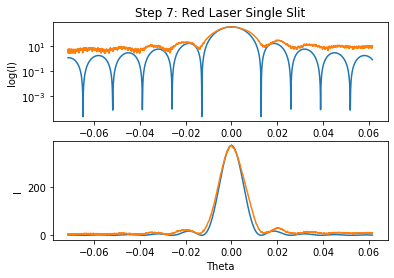

In [46]:
lmbda = 650e-9;
w = meanw;
s = 999;
N = 1;
i = 0

data = np.loadtxt('Red_1slit0.04.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Step 7: Red Laser Single Slit")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


4.439909354183551e-05


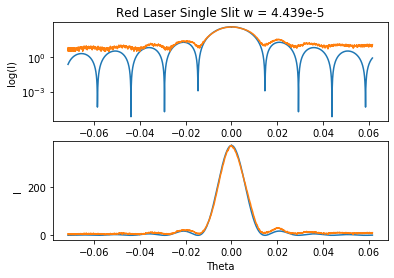

In [83]:
#All in code for other setup
PAI = pi;
stheta = np.array([0.01467,0.01461]);
lmbda = 650e-9;
k = 2*pi/lmbda;
w = 2*PAI/(k*stheta);
meanw = mean(w)
std = np.std(w)

w = meanw;
s = 999;
N = 1;
i = 0

data = np.loadtxt('Red_1slit0.04.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Red Laser Single Slit w = 4.439e-5")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
print(w)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


0.00011607827087468841


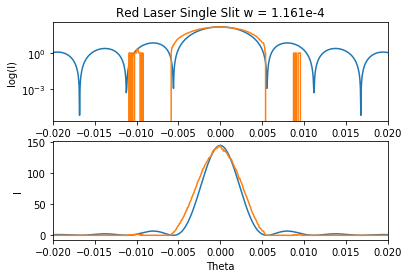

In [84]:
#All in code for other setup
PAI = pi;
stheta = np.array([0.005857,0.005364]);
lmbda = 650e-9;
k = 2*pi/lmbda;
w = 2*PAI/(k*stheta);
meanw = mean(w)
std = np.std(w)

w = meanw;
s = 999;
N = 1;
i = 0

data = np.loadtxt('Red_1slit0.08.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Red Laser Single Slit w = 1.161e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
print(w)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


0.00020472440944881894


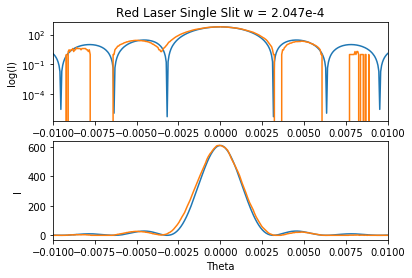

In [85]:
#All in code for other setup
PAI = pi;
stheta = np.array([0.003175]);
lmbda = 650e-9;
k = 2*pi/lmbda;
w = 2*PAI/(k*stheta);
meanw = mean(w)
std = np.std(w)

w = meanw;
s = 999;
N = 1;
i = 0

data = np.loadtxt('Red_1slit0.16.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Red Laser Single Slit w = 2.047e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.01)
pyplot.xlim(left=-0.01)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.01)
pyplot.xlim(left=-0.01)
print(w)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


5.009416195856875e-05


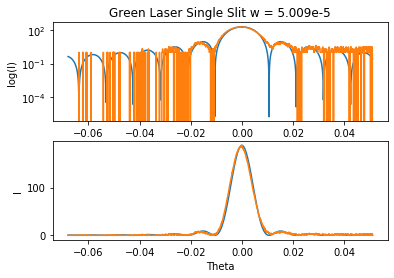

In [55]:
#All in code for other setup
PAI = pi;
stheta = np.array([0.01062]);
lmbda = 532e-9;
k = 2*pi/lmbda;
w = 2*PAI/(k*stheta);
meanw = mean(w)
std = np.std(w)

w = meanw;
s = 999;
N = 1;
i = 0

data = np.loadtxt('Green_1slit0.04.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Green Laser Single Slit w = 5.009e-5")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
print(w)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


8.957736992759725e-05


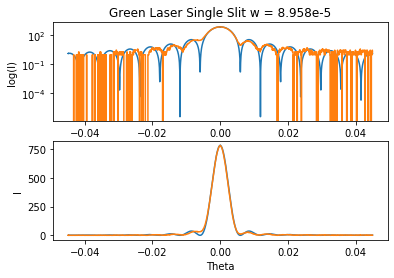

In [57]:
#All in code for other setup
PAI = pi;
stheta = np.array([0.005802,0.006076]);
stheta = mean(stheta)
lmbda = 532e-9;
k = 2*pi/lmbda;
w = 2*PAI/(k*stheta);
meanw = mean(w)
std = np.std(w)

w = meanw;
s = 999;
N = 1;
i = 0

data = np.loadtxt('Green_1slit0.08.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Green Laser Single Slit w = 8.958e-5")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
print(w)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


0.00018689618830142283


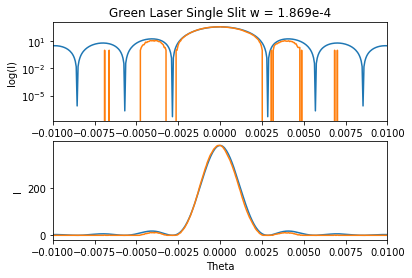

In [86]:
#All in code for other setup
PAI = pi;
stheta = np.array([0.002518,0.003175]);
stheta = mean(stheta)
lmbda = 532e-9;
k = 2*pi/lmbda;
w = 2*PAI/(k*stheta);
meanw = mean(w)
std = np.std(w)

w = meanw;
s = 999;
N = 1;
i = 0

data = np.loadtxt('Green_1slit0.16.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Green Laser Single Slit w = 1.869e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.01)
pyplot.xlim(left=-0.01)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.01)
pyplot.xlim(left=-0.01)
print(w)

TWO SLIT

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


4.482758620689656e-05
0.00013806287170773152


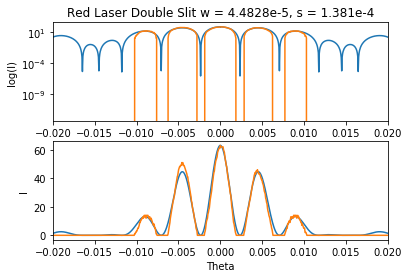

In [75]:
#All in code for other setup for two or more slits
PAI = pi;
stheta = np.array([0.001916,0.002792]);
sthetaw = np.array([0.0145]);
#sthetaw  = np.array([0.06295,0.007663]);
stheta = mean(stheta)
sthetaw = mean(sthetaw)
lmbda = 650e-9;
N = 2;
k = 2*pi/lmbda;
s = 2*PAI/(N*k*stheta);
w = 2*PAI/(k*sthetaw);
meanw = mean(w)

w = meanw;
i = 0

data = np.loadtxt('Red_2slits_d0.125_a=0.04.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Red Laser Double Slit w = 4.4828e-5, s = 1.381e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
print(w)
print(s)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


4.433333333333333e-05
0.00015101623708413766


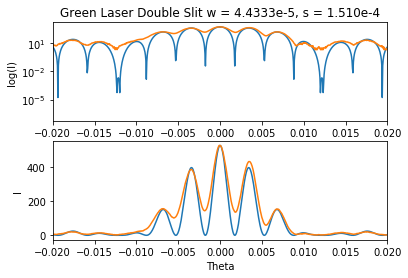

In [79]:
#All in code for other setup for two or more slits
PAI = pi;
#stheta = np.array([0.001806,0.001861]);   0.0018335
#sthetaw = np.array([0.012]);
stheta = np.array([0.0017614]);
sthetaw = np.array([0.012]);
stheta = mean(stheta)
sthetaw = mean(sthetaw)
lmbda = 532e-9;
N = 2;
k = 2*pi/lmbda;
s = 2*PAI/(N*k*stheta);
w = 2*PAI/(k*sthetaw);
meanw = mean(w)

w = meanw;
i = 0

data = np.loadtxt('Green_2slit.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Green Laser Double Slit w = 4.4333e-5, s = 1.510e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
print(w)
print(s)


FOUR SLIT

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


4.482758620689656e-05
0.00014142732811140123


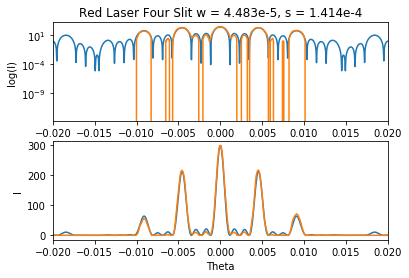

In [70]:
#All in code for other setup for two or more slits
PAI = pi;
#stheta = np.array([0.001259]);
#sthetaw = np.array([0.016]);
stheta = np.array([0.001149]);
sthetaw = np.array([0.0145]);
stheta = mean(stheta)
sthetaw = mean(sthetaw)
lmbda = 650e-9;
N = 4;
k = 2*pi/lmbda;
s = 2*PAI/(N*k*stheta);
w = 2*PAI/(k*sthetaw);

i = 0

data = np.loadtxt('Red_4slits_d0.125.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Red Laser Four Slit w = 4.483e-5, s = 1.414e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
print(w)
print(s)


Text(0, 0.5, 'intense')

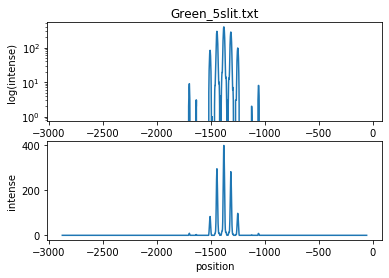

In [33]:
#All in code for other setup for two or more slits
file = 'Green_5slit.txt';
data = np.loadtxt(file,delimiter=',', skiprows=10);
position = data[:,0];
intense = data[:,1]

subplot(211);
pyplot.title(file)
semilogy(position,intense)
pyplot.xlabel("position")
pyplot.ylabel("log(intense)")
subplot(212);
plot(position,intense)
pyplot.xlabel("position")
pyplot.ylabel("intense")

FIVE SLIT

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


3.6111111111111116e-05
0.0001402373247033441


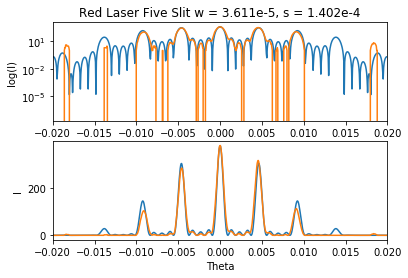

In [72]:
#All in code for other setup for two or more slits
PAI = pi;
#stheta = np.array([0.00104,0.001095]);
stheta = np.array(0.000927);
sthetaw = np.array([0.018]);
stheta = mean(stheta)
sthetaw = mean(sthetaw)
lmbda = 650e-9;
N = 5;
k = 2*pi/lmbda;
s = 2*PAI/(N*k*stheta);
w = 2*PAI/(k*sthetaw);

i = 0

data = np.loadtxt('Red_5slits_d0.125.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Red Laser Five Slit w = 3.611e-5, s = 1.402e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
print(w)
print(s)

In [390]:
print(stheta)

0.0010674999999999999


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


4.836363636363637e-05
0.0001505802434191905


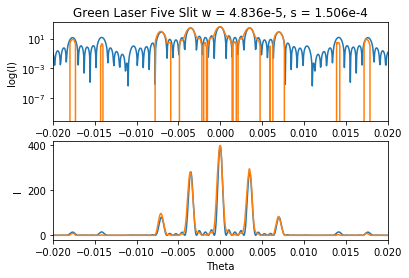

In [74]:
#All in code for other setup for two or more slits (Curve fit)
PAI = pi;
Start = 0;
End = 3020;
#stheta = np.array([0.0006566]);
stheta = np.array([0.0007066]);
sthetaw = np.array([0.011]);
stheta = mean(stheta)
sthetaw = mean(sthetaw)
lmbda = 532e-9;
N = 5;
k = 2*pi/lmbda;
s = 2*PAI/(N*k*stheta);
w = 2*PAI/(k*sthetaw);

i = 0

data = np.loadtxt('Green_5slit.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
intense = intense[Start:End]

pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
theta = theta[Start:End]

I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Green Laser Five Slit w = 4.836e-5, s = 1.506e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
print(w)
print(s)


In [ ]:
#To be decided: Curve_fit function
pguess = [w,s,N,lmbda,scale]
sy = repeat(10,len(sin(theta)))
p,cov = curve_fit(diffract,theta,intense,sigma = sy, p0 = pguess, maxfev=10000);

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


Text(0, 0.5, 'I')

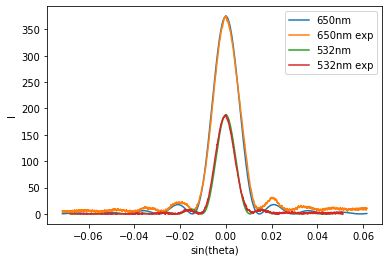

In [45]:
#All in code for other setup for two or more slits (Curve fit)
PAI = pi;
Start = 0;
End = 3020;
#stheta = np.array([0.0006566]);
stheta = np.array([0.0007066]);
sthetaw = np.array([0.011]);
stheta = mean(stheta)
sthetaw = mean(sthetaw)
lmbda = 532e-9;
N = 5;
k = 2*pi/lmbda;
s = 2*PAI/(N*k*stheta);
w = 2*PAI/(k*sthetaw);

i = 0

data = np.loadtxt('Green_5slit.txt',delimiter=',', skiprows=10);
resolution = 54.74 * 10**(-6)
position = data[:,0]
abspos = abs(position)

intense = data[:,1]
maxind = np.argmax(intense);
intense = intense[Start:End]

pos = abspos - abspos[maxind]
posInMeter = pos*resolution;
theta = arctan(posInMeter)
theta = theta[Start:End]

I = np.zeros(size(theta))
scale = max(intense)/((N*w)**2)
for angle in theta:
    I[i] = diffract(angle,w,s,N,lmbda,scale);
    i = i + 1;
subplot(211);
pyplot.title("Green Laser Five Slit w = 4.836e-5, s = 1.506e-4")
semilogy(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("log(I)")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
subplot(212);
plot(sin(theta),I,sin(theta),intense)
pyplot.xlabel("Theta")
pyplot.ylabel("I")
pyplot.xlim(right=0.02)
pyplot.xlim(left=-0.02)
print(w)
print(s)